## HIERARCHICAL CLUSTERING

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### READ THE DATASETS


In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns= ['id','gender','age','income','spending']

In [6]:
df.head()

,id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        200 non-null    int64 
 1   gender    200 non-null    object
 2   age       200 non-null    int64 
 3   income    200 non-null    int64 
 4   spending  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isna().sum()

id          0
gender      0
age         0
income      0
spending    0
dtype: int64

### CLUSTER SIMILAR CUSTOMERS TOGETHER ON BASIS OF INCOME AND SPENDING

In [9]:
X = df[['income','spending']]
X.head()

,income,spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### preprocessing X data

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [11]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])

In [12]:
x_pre=num_pipe.fit_transform(X)
x_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### APPLY HIERARCHICAL CLUSTERING

In [13]:
from sklearn.cluster import AgglomerativeClustering


In [15]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(x_pre)

AgglomerativeClustering(n_clusters=3)

In [16]:
lb= model.labels_
lb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

### SILHOUTTE SCORE CALCULATION

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(x_pre,lb)

0.4610481446570447

### DIFFERENT NO. OF CLUSTERS

In [19]:
cl= list(range(2,11))
cl

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
scores=[]

In [22]:
for i in range(2,11):
    agc= AgglomerativeClustering(n_clusters=i)
    agc.fit(x_pre)
    lb= agc.labels_
    s=silhouette_score(x_pre,lb)
    scores.append(s)

In [23]:
scores

[0.3842337621772661,
 0.4610481446570447,
 0.4925507715349343,
 0.5538089226688662,
 0.5386761871036926,
 0.5197949293475768,
 0.4308617778221774,
 0.43768997758154127,
 0.4339007174968657]

In [24]:
import matplotlib.pyplot as plt

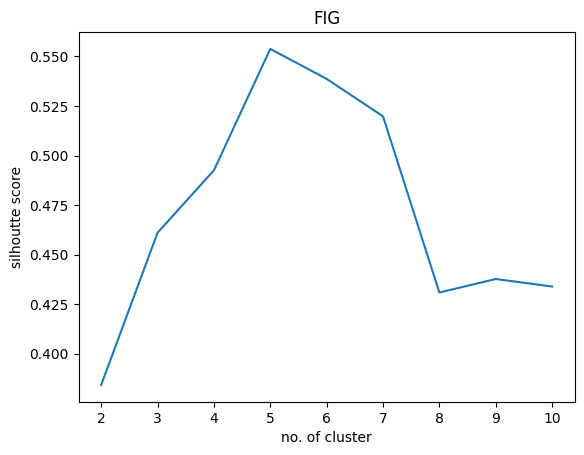

In [25]:
plt.plot(list(range(2,11)),scores)
plt.xlabel('no. of cluster')
plt.ylabel('silhoutte score')
plt.title('FIG')
plt.show()

### CREATE A FINAL MODEL WHICH IS HIGHEST SILHOUTTE SCORE

In [26]:
best_agc= AgglomerativeClustering(n_clusters=5)
best_agc.fit(x_pre)

AgglomerativeClustering(n_clusters=5)

In [27]:
final_labels=best_agc.labels_

### ADD THIS VALUE TO X

In [28]:
X['labels']=final_labels

In [29]:
X.head()

,income,spending,labels
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [31]:
for i in range(5):
    print(f'customers class : {i}')
    display(X[X['labels']==i])
    print('\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\n')

customers class : 0


,income,spending,labels
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

customers class : 1


,income,spending,labels
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

customers class : 2


,income,spending,labels
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

customers class : 3


,income,spending,labels
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

customers class : 4


,income,spending,labels
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



### VISUALIZE THE CLUSTERS

In [32]:
import seaborn as sns

<Axes: xlabel='income', ylabel='spending'>

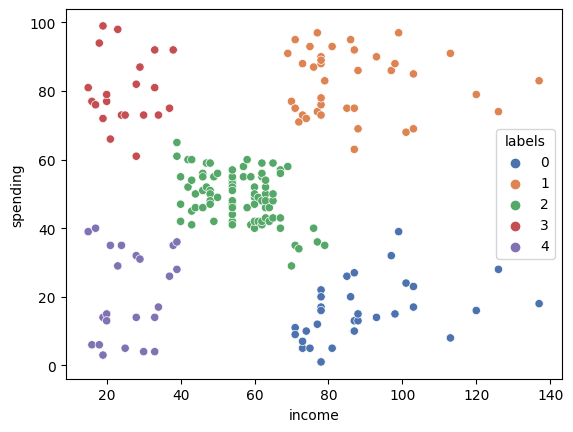

In [33]:
sns.scatterplot(data=X,x='income',y='spending',hue='labels',palette='deep')

### DENDROGRAM FOR HIERARCHICAL CLUSTERING

In [34]:
from scipy.spatial import distance_matrix
DM=distance_matrix(x_pre,x_pre)

In [35]:
from scipy.cluster.hierarchy import linkage
linkages=linkage(DM)

In [36]:
from scipy.cluster.hierarchy import dendrogram



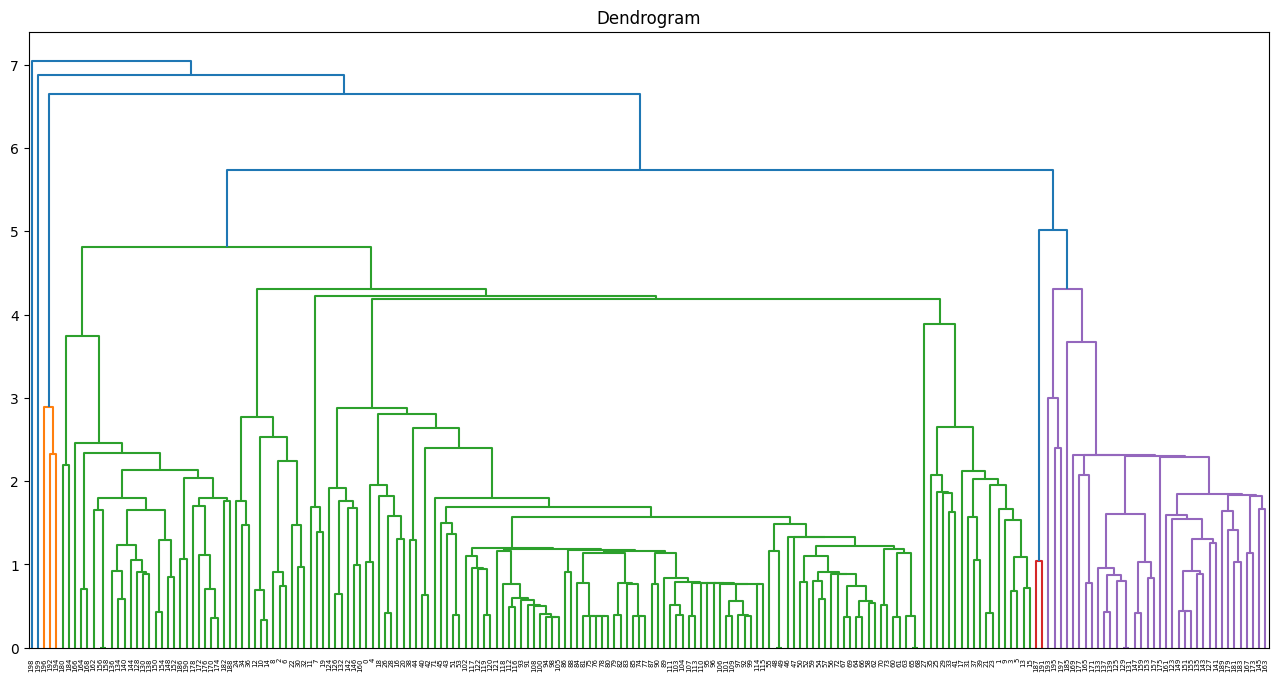

In [37]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
Q= dendrogram(linkages)